In [3]:
import numpy as np
from pathlib import Path
import sys
from statannot.statannot import add_stat_annotation

import matplotlib.pyplot as plt
import seaborn as sbn

dir_path = '/home/nnieto/Nico/Harmonization/harmonize_project/3_check_results/'
__file__ = dir_path+'plot_NM.py'
to_append = Path(__file__).resolve().parent.parent.as_posix()
sys.path.append(to_append)

from lib.utils import extract_experiment_data_oos # noqa
from lib.utils import table_generation # noqa

# DATASETS: eNKI, 1000brains, CamCAN, AOMIC-ID1000. PRED: RVR, STACK: RF.
# Separed site analysis

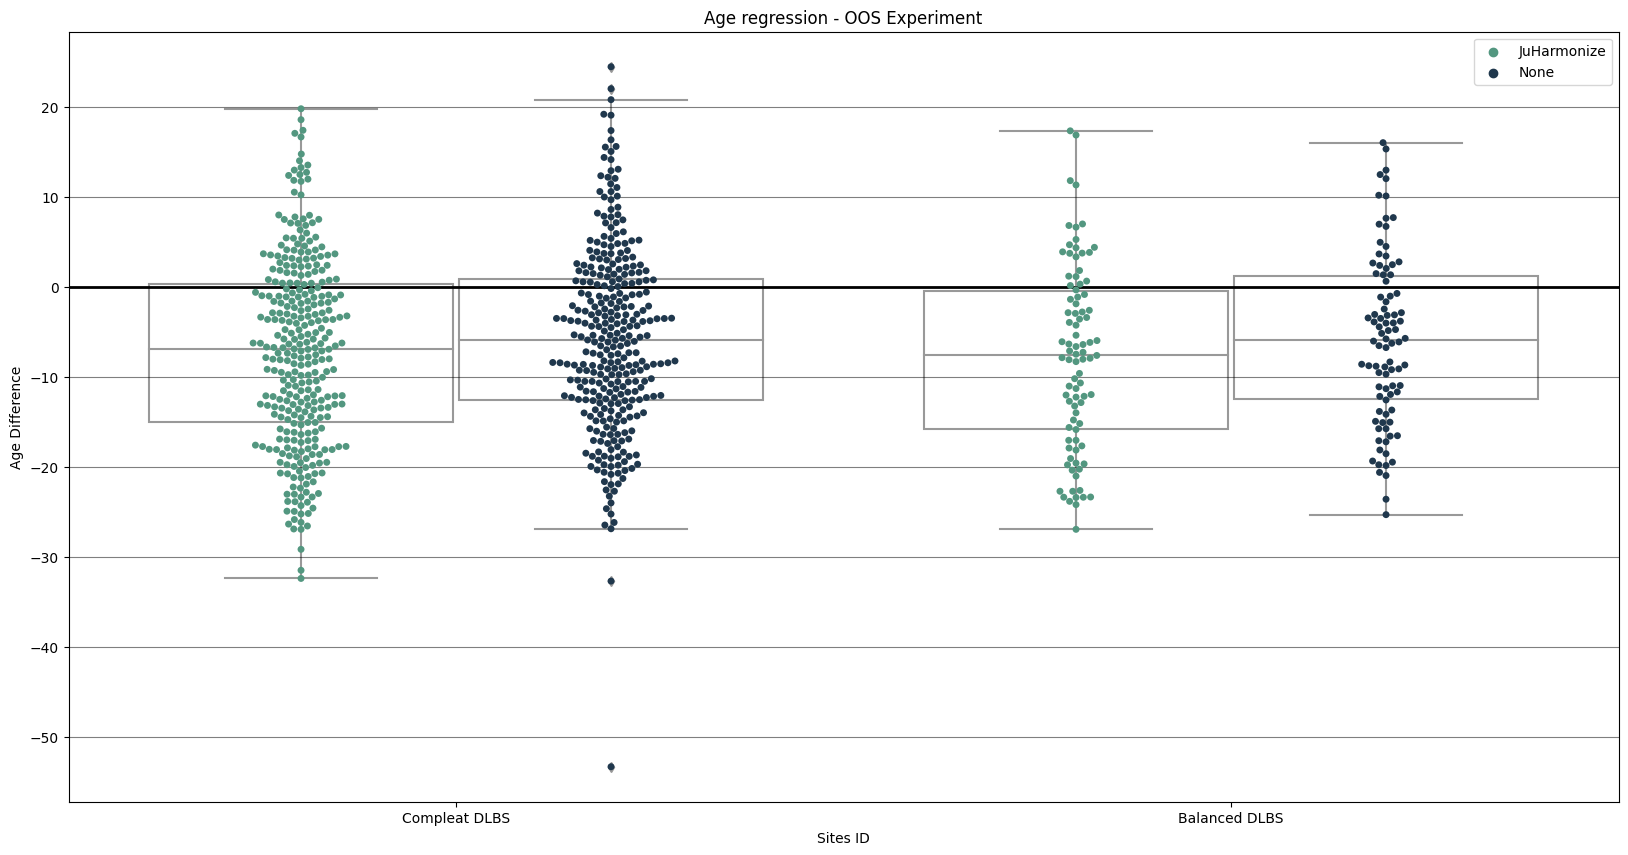

             Age_bias        R2        MAE
JuHarmonize -0.785854  0.588147  10.320988
None        -0.621320  0.655219   9.409877


In [4]:
exp_dir = "/home/nnieto/Nico/Harmonization/results_regression_oos/"
experiments_to_check = {'test_regression_oos_balanced_data_DLBS_full_rvr_pred_rvr_stack'} # noqa
data = extract_experiment_data_oos(exp_dir, experiments_to_check)
data.rename(columns={"harmonize_mode": "Harmonization Schemes"},
            inplace=True)

data["Harmonization Schemes"].replace(
                            {"pretend_nosite": "JuHarmonize",
                             "none": "None"},
                            inplace=True)


harm_modes = ["JuHarmonize", "None"]
absolute = False
site_list = ["Compleat DLBS", "DLBS"]
# Select methods to plot
data = data[data["Harmonization Schemes"].isin(harm_modes)]

data["site"].replace({"DLBS_full": "Compleat DLBS",
                     "DLBS": "Balanced DLBS"}, inplace=True)
# Plot
_, ax = plt.subplots(1, 1, figsize=[20, 10])

if absolute:
    data["y_diff"] = np.abs(data["y_true"] -
                            data["y_pred"])
else:
    data["y_diff"] = data["y_true"]-data["y_pred"]

pal = sbn.cubehelix_palette(2, rot=-.5, light=0.5, dark=0.2)
sbn.swarmplot(
    data=data, palette=pal,
    x="site", y="y_diff", hue="Harmonization Schemes",
    hue_order=harm_modes, dodge=True, ax=ax
)
sbn.boxplot(
    data=data, color="w", zorder=1,
    x="site", y="y_diff", hue="Harmonization Schemes",
    hue_order=harm_modes, dodge=True, ax=ax, palette=["w"]*len(harm_modes)
)
ax.axhline(0, lw=2, color="k", ls="-", alpha=1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:len(harm_modes)], labels[:len(harm_modes)])

plt.ylabel("Age Difference")
plt.xlabel("Sites ID")
plt.title("Age regression - OOS Experiment")
plt.grid(alpha=0.5, axis="y", c="black")
plt.show()

table = table_generation(data)
print(table)